In [1]:
from diff_cap_packages import Xy
from diff_cap_packages import ta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = Xy.get_prices_df()

In [3]:
df

,930060,699903,879841,314909,15362F,315452,884570,992762,879650,315449,...,9511Z8,95335N,96147L,9664FT,9664FU,9911WP,9930FR,99142R,2569A8,2579PR
date,,,,,,,,,,,,,,,,,,,,,
2003-01-02,25.50,1.47,5.80,32.08,9.90,6.14,5.63,1.99,1.70,13.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-03,25.70,1.47,5.80,32.70,9.80,6.14,5.50,2.04,1.70,13.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-06,25.60,1.47,5.80,33.35,9.80,6.19,5.50,2.13,1.70,13.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-07,25.50,1.47,5.75,35.50,9.80,6.19,5.50,2.20,1.70,13.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-08,25.50,1.47,5.75,34.24,9.80,6.19,5.50,2.18,1.70,13.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24,99.28,0.02,7.60,134.00,57.01,6.00,7.08,0.39,1.92,22.2,...,1385.99,484.44,60.47,43.77,43.99,0.94,119.50,91.77,532.00,36.47
2021-06-25,99.00,0.02,7.60,135.49,57.01,6.02,7.08,0.39,1.92,22.2,...,1379.04,491.00,59.50,44.25,43.95,0.93,120.33,90.98,535.10,37.12
2021-06-28,97.65,0.02,7.60,131.65,57.01,5.69,7.08,0.39,1.92,22.2,...,1396.07,480.00,59.54,43.22,43.69,0.90,120.00,90.54,536.65,37.49


In [4]:
x,y = Xy.get_market_Xy(target_id="930060")

In [5]:
df = y["930060 +0 day"].pct_change() * 100
df = df.rename("Today")
df = df.reset_index()

In [6]:
for i in range(1,6):
    df["Lag " + str(i)] = df["Today"].shift(i)

In [7]:
df

,date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5
0,2003-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1,2003-01-03,0.784314,NaN,NaN,NaN,NaN,NaN
2,2003-01-06,-0.389105,0.784314,NaN,NaN,NaN,NaN
3,2003-01-07,-0.390625,-0.389105,0.784314,NaN,NaN,NaN
4,2003-01-08,0.000000,-0.390625,-0.389105,0.784314,NaN,NaN
...,...,...,...,...,...,...,...
4651,2021-06-24,0.000000,0.996948,1.602067,-0.606123,-3.355838,-2.194601
4652,2021-06-25,-0.282031,0.000000,0.996948,1.602067,-0.606123,-3.355838
4653,2021-06-28,-1.363636,-0.282031,0.000000,0.996948,1.602067,-0.606123
4654,2021-06-29,1.720430,-1.363636,-0.282031,0.000000,0.996948,1.602067


In [8]:
volume = Xy.get_volumes_df()

In [9]:
df["Volume"] = volume["930060"].shift(1).values

In [10]:
df = df.dropna()

In [11]:
df

,date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume
6,2003-01-10,0.393701,-0.392157,0.000000,-0.390625,-0.389105,0.784314,161.2
7,2003-01-13,0.000000,0.393701,-0.392157,0.000000,-0.390625,-0.389105,195.0
8,2003-01-14,0.392157,0.000000,0.393701,-0.392157,0.000000,-0.390625,555.3
9,2003-01-15,0.000000,0.392157,0.000000,0.393701,-0.392157,0.000000,54.5
10,2003-01-16,0.195312,0.000000,0.392157,0.000000,0.393701,-0.392157,45.0
...,...,...,...,...,...,...,...,...
4651,2021-06-24,0.000000,0.996948,1.602067,-0.606123,-3.355838,-2.194601,196.5
4652,2021-06-25,-0.282031,0.000000,0.996948,1.602067,-0.606123,-3.355838,62.4
4653,2021-06-28,-1.363636,-0.282031,0.000000,0.996948,1.602067,-0.606123,83.5
4654,2021-06-29,1.720430,-1.363636,-0.282031,0.000000,0.996948,1.602067,92.1


In [12]:
df["Direction"] = [1 if i > 0 else 0 for i in df["Today"]]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df

,date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Direction
6,2003-01-10,0.393701,-0.392157,0.000000,-0.390625,-0.389105,0.784314,161.2,1
7,2003-01-13,0.000000,0.393701,-0.392157,0.000000,-0.390625,-0.389105,195.0,0
8,2003-01-14,0.392157,0.000000,0.393701,-0.392157,0.000000,-0.390625,555.3,1
9,2003-01-15,0.000000,0.392157,0.000000,0.393701,-0.392157,0.000000,54.5,0
10,2003-01-16,0.195312,0.000000,0.392157,0.000000,0.393701,-0.392157,45.0,1
...,...,...,...,...,...,...,...,...,...
4651,2021-06-24,0.000000,0.996948,1.602067,-0.606123,-3.355838,-2.194601,196.5,0
4652,2021-06-25,-0.282031,0.000000,0.996948,1.602067,-0.606123,-3.355838,62.4,0
4653,2021-06-28,-1.363636,-0.282031,0.000000,0.996948,1.602067,-0.606123,83.5,0
4654,2021-06-29,1.720430,-1.363636,-0.282031,0.000000,0.996948,1.602067,92.1,1


In [14]:
df = sm.add_constant(df)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [15]:
df

,const,date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Direction
6,1.0,2003-01-10,0.393701,-0.392157,0.000000,-0.390625,-0.389105,0.784314,161.2,1
7,1.0,2003-01-13,0.000000,0.393701,-0.392157,0.000000,-0.390625,-0.389105,195.0,0
8,1.0,2003-01-14,0.392157,0.000000,0.393701,-0.392157,0.000000,-0.390625,555.3,1
9,1.0,2003-01-15,0.000000,0.392157,0.000000,0.393701,-0.392157,0.000000,54.5,0
10,1.0,2003-01-16,0.195312,0.000000,0.392157,0.000000,0.393701,-0.392157,45.0,1
...,...,...,...,...,...,...,...,...,...,...
4651,1.0,2021-06-24,0.000000,0.996948,1.602067,-0.606123,-3.355838,-2.194601,196.5,0
4652,1.0,2021-06-25,-0.282031,0.000000,0.996948,1.602067,-0.606123,-3.355838,62.4,0
4653,1.0,2021-06-28,-1.363636,-0.282031,0.000000,0.996948,1.602067,-0.606123,83.5,0
4654,1.0,2021-06-29,1.720430,-1.363636,-0.282031,0.000000,0.996948,1.602067,92.1,1


In [16]:
X = df[["const", "Lag 1", "Lag 2", "Lag 3", "Lag 4", "Lag 5", "Volume"]]
Y = df.Direction

In [ ]:
model = sm.Logit(Y,X)

In [ ]:
result = model.fit()

In [ ]:
result.summary()

In [ ]:
prediction = result.predict(X)
prediction

In [ ]:
def confusion_matrix(act,pred):
    predtrans = ["Up" if i > .5 else "Down" for i in pred]
    actuals = ["Up" if i > 0 else "Down" for i in act]
    confusion_matrix = pd.crosstab(pd.Series(actuals), pd.Series(predtrans), rownames=["Actual"], colnames=["Predicted"])
    
    return confusion_matrix

In [ ]:
confusion_matrix(Y, prediction)

In [ ]:
len(df)

In [ ]:
(2410+43)/4497

In [ ]:
x_train = df[df.date.dt.year < 2018][["const", "Lag 1", "Lag 2", "Lag 3", "Lag 4", "Lag 5", "Volume"]]
y_train = df[df.date.dt.year < 2018]["Direction"]

x_test = df[df.date.dt.year >=2018][["const", "Lag 1", "Lag 2", "Lag 3", "Lag 4", "Lag 5", "Volume"]]
y_test = df[df.date.dt.year >= 2018]["Direction"]


In [ ]:
len(x_train)

In [ ]:
len(x_test)

In [ ]:
model = sm.Logit(y_train,x_train)

In [ ]:
result = model.fit()

In [ ]:
prediction = result.predict(x_test)

In [ ]:
confusion_matrix(y_test,prediction)

In [ ]:
(425+8)/len(x_test)

In [ ]:
prediction

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
len(x_train)
y_pred = model.predict(x_test)
LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [27]:
y_test

1467    1
4603    1
3992    0
1042    1
4206    1
       ..
2804    1
3827    0
3835    0
3693    0
2183    0
Name: Direction, Length: 900, dtype: int64

In [28]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
confusion_matrix(y_test, y_pred)


array([[462,  35],
       [379,  24]])

In [26]:
model.score(x_train, y_train)
model.score(x_test, y_test)

0.54

[[462  35]
 [379  24]]


IndexError: index 2 is out of bounds for axis 1 with size 2

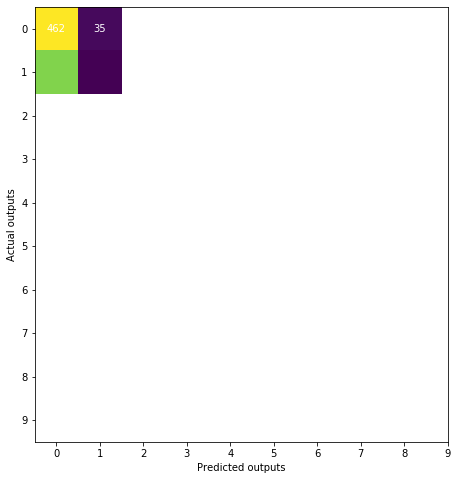

In [24]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs')
ax.set_ylabel('Actual outputs')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.93      0.69       497
           1       0.41      0.06      0.10       403

    accuracy                           0.54       900
   macro avg       0.48      0.49      0.40       900
weighted avg       0.49      0.54      0.43       900



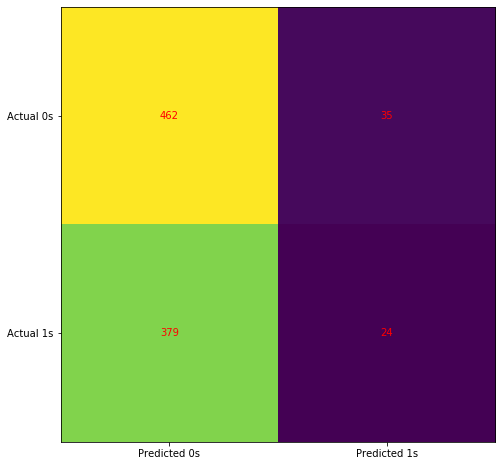

In [30]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [32]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X, Y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [33]:
model.intercept_

array([-0.0887462])

In [34]:
model.coef_

array([[-8.87461995e-02, -2.53328309e-02, -1.46051927e-02,
         3.86830814e-02, -1.50855512e-02, -1.69282763e-02,
        -2.62749569e-05]])

In [36]:
model.predict_proba(X)

array([[0.54842555, 0.45157445],
       [0.54348545, 0.45651455],
       [0.55141517, 0.44858483],
       ...,
       [0.53690381, 0.46309619],
       [0.54572395, 0.45427605],
       [0.55755373, 0.44244627]])

In [37]:
model.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
model.score(X, Y)

0.5454747609517456

In [46]:
confusion_matrix(Y, model.predict(X))

array([[2410,   44],
       [2000,   43]])

In [43]:
print(classification_report(Y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.55      0.98      0.70      2454
           1       0.49      0.02      0.04      2043

    accuracy                           0.55      4497
   macro avg       0.52      0.50      0.37      4497
weighted avg       0.52      0.55      0.40      4497

